<a href="https://colab.research.google.com/github/KOSHALESHMEHER/DIGIT_RECOGNITION/blob/master/Hand_Written_Digit_Recog_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DROPOUT**
(Helps to increase the test accuracy)

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.optim as optim

In [0]:
trainset = torchvision.datasets.MNIST(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

0it [00:00, ?it/s]

9920512it [00:02, 3888564.54it/s]                             


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


0it [00:00, ?it/s]

32768it [00:00, 57321.86it/s]                           
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


1654784it [00:01, 952675.02it/s]                             
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


8192it [00:00, 21669.18it/s]            

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [0]:
batch_size = 4

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[0].shape)
print(labels[0].item())

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])
8


In [0]:
def imshow(img, title):
    
    plt.figure(figsize=(batch_size * 4, 4))
    plt.axis('off')
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.title(title)
    plt.show()

In [0]:
def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    
    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])
    
    return images, labels

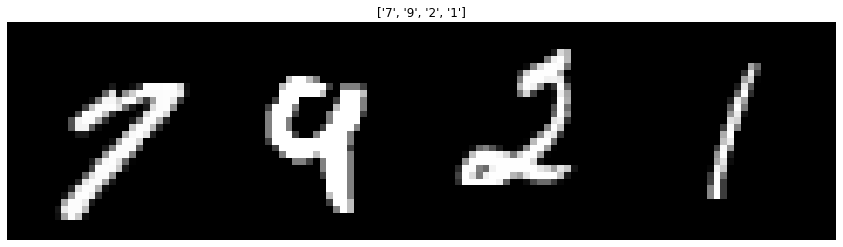

In [0]:
images, labels = show_batch_images(trainloader)

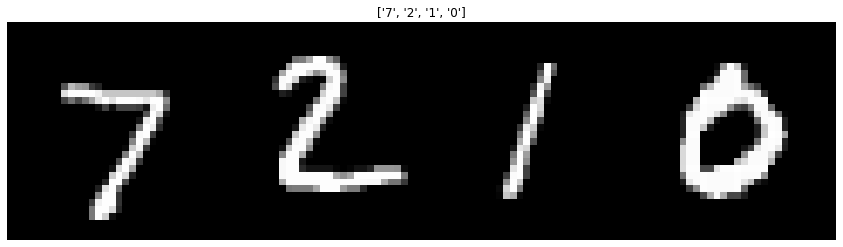

In [0]:
images, labels = show_batch_images(testloader)

In [0]:
class CNN_BN(nn.Module):
    def __init__(self): 
        super(CNN_BN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 3, 5),         # (N, 1, 28, 28) -> (N,  3, 24, 24)
            nn.BatchNorm2d(3),
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2),  # (N, 3, 24, 24) -> (N,  3, 12, 12)
            nn.Conv2d(3, 6, 3),
            nn.Dropout2d(0.5),
            nn.BatchNorm2d(6)           # (N, 3, 12, 12) -> (N,  6, 10, 10) 
         )
        self.features1 = nn.Sequential(
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2)   # (N, 6, 10, 10) -> (N,  6, 5, 5)
        )
        self.classifier = nn.Sequential(
            nn.Linear(150, 125),         # (N, 150) -> (N, 25)
            nn.Dropout(0.5),
            nn.BatchNorm1d(125),
            nn.ReLU(),
            nn.Linear(125,25),
            nn.Dropout(0.5),
            nn.ReLU(),
            nn.Linear(25,10)            # (N, 25) -> (N, 10)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = self.features1(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x
    

In [0]:
model = CNN_BN()

In [0]:
batch_size = 512

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

## **GPU Execution**

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [0]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
model = CNN_BN().to(device)

In [0]:
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(model.parameters())

Epoch: 0/20, Test acc: 65.76      Train  acc: 65.00  
Epoch: 1/20, Test acc: 77.64      Train  acc: 77.04  
Epoch: 2/20, Test acc: 81.02      Train  acc: 80.68  
Epoch: 3/20, Test acc: 83.27      Train  acc: 82.85  
Epoch: 4/20, Test acc: 85.06      Train  acc: 84.12  
Epoch: 5/20, Test acc: 85.39      Train  acc: 85.00  
Epoch: 6/20, Test acc: 85.74      Train  acc: 85.28  
Epoch: 7/20, Test acc: 86.44      Train  acc: 86.09  
Epoch: 8/20, Test acc: 86.85      Train  acc: 86.48  
Epoch: 9/20, Test acc: 86.61      Train  acc: 86.14  
Epoch: 10/20, Test acc: 87.07      Train  acc: 86.50  
Epoch: 11/20, Test acc: 88.08      Train  acc: 87.24  
Epoch: 12/20, Test acc: 87.51      Train  acc: 86.80  
Epoch: 13/20, Test acc: 88.12      Train  acc: 87.62  
Epoch: 14/20, Test acc: 87.59      Train  acc: 87.31  
Epoch: 15/20, Test acc: 88.05      Train  acc: 87.50  
Epoch: 16/20, Test acc: 88.77      Train  acc: 87.72  
Epoch: 17/20, Test acc: 88.14      Train  acc: 87.77  
Epoch: 18/20, Test a

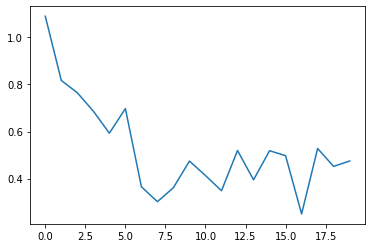

CPU times: user 9min 19s, sys: 3.69 s, total: 9min 23s
Wall time: 9min 24s


In [0]:
%%time

loss_epoch_model_arr = []

max_epochs = 20

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # train model
        opt.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        
    loss_epoch_model_arr.append(loss.item())
      
    print('Epoch: %d/%d, Test acc: %0.2f      Train  acc: %0.2f  ' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    

plt.plot(loss_epoch_model_arr)
plt.show()